# Investing On ETFs Using The Kelly Formula

## How To Find The Optimal Capital Allocation Using The Kelly Formula

## Introduction
...

## Exchange Traded Fund (ETF)
...

## Vanguard
...


### Jack Bogle
...


### Vanguard ETFs
...


## Retrieve Vanguard ETFs Data
1. Source Vanguard ETFs list of tickers.
2. Source Vanguard ETFs historical OHLCV data.

## Source Vanguard ETFs List Of Tickers

Import packages

In [1]:
import pandas as pd

In [2]:
from pandas import Series, DataFrame

In [3]:
from selenium import webdriver

In [4]:
import pandas_datareader as web

In [5]:
import pickle

In [6]:
import matplotlib.pyplot as plt

In [7]:
%matplotlib inline

Create a new instance of Google Chrome

In [8]:
driver = webdriver.Chrome('/Applications/chromedriver')

Open the Vanguard website containing the ETF list

In [9]:
driver.get('https://investor.vanguard.com/etf/list')

Inspecting the page, we notice that the information is stored in a table, and each entry is in a tr with class name equal to "productEntry". We use find_elements_by_class_name to get the list of ETFs.

In [10]:
content = driver.find_elements_by_class_name('productEntry')

Count the number of elements in content

In [11]:
len(content)

118

Inspect the content

In [12]:
for i in content:
    print(i.text)

Extended Duration Treasury ETF
Vanguard Select Funds
Intermediate-Term Bond ETF
Intermediate-Term Treasury ETF
Vanguard Select Funds
Long-Term Bond ETF
Long-Term Treasury ETF
Mortgage-Backed Securities ETF
Vanguard Select Funds
Short-Term Bond ETF
Vanguard Select Funds
Short-Term Inflation-Protected Securities ETF
Short-Term Treasury ETF
Vanguard Select Funds
Total Bond Market ETF
Intermediate-Term Corporate Bond ETF
Long-Term Corporate Bond ETF
Short-Term Corporate Bond ETF
Total Corporate Bond ETF
Vanguard Select Funds
Tax-Exempt Bond ETF
Dividend Appreciation ETF
ESG U.S. Stock ETF
Growth ETF
High Dividend Yield ETF
Large-Cap ETF
Mega Cap ETF
Mega Cap Growth ETF
Mega Cap Value ETF
Vanguard Select Funds
S&P 500 ETF
Vanguard Select Funds
Total Stock Market ETF
Value ETF
Vanguard Select Funds
Extended Market ETF
Mid-Cap ETF
Mid-Cap Growth ETF
Mid-Cap Value ETF
Small-Cap ETF
Small-Cap Growth ETF
Small-Cap Value ETF
Total World Bond ETF
Vanguard Select Funds
Total International Bond ETF


VIS Stock - Sector 0.10% $139.59 $3.43
increased
2.52%
increased
1.73%B
30 day
5/31/2019 16.55% -1.58% 7.54% 14.44% 8.93% (09/23/2004)
VGT Stock - Sector 0.10% $197.36 $6.50
increased
3.40%
increased
1.34%B
30 day
5/31/2019 18.71% 7.61% 17.18% 18.10% 10.10% (01/26/2004)
VAW Stock - Sector 0.10% $122.16 $3.66
increased
3.09%
increased
2.13%B
30 day
5/31/2019 10.76% -11.39% 3.11% 9.92% 7.70% (01/26/2004)
VNQ Stock - Sector 0.12% $86.79 -$0.32
decreased
-0.37%
decreased
note 17.18% 14.91% 7.58% 14.92% 8.72% (09/23/2004)
VPU Stock - Sector 0.10% $131.12 $0.20
increased
0.15%
increased
3.21%B
30 day
5/31/2019 12.12% 17.11% 10.36% 12.69% 10.07% (01/26/2004)


We notice the following structure:
1. Elements 0-58 are the names of the ETFs.
2. Elements 59-118 are the tickers, asset class, etc. of the ETFs.

Create list for ETF names and tickers

In [13]:
# Initialize
etf_names = []
etf_tickers = []

for i in range(0, 59):
    # Get the names
    try:
        etf_names.append(content[i].text.split('\n')[1])
    except IndexError:
        etf_names.append(content[i].text)
    
    # Get the tickers
    etf_tickers.append(content[i + 59].text.split()[0])

Create Vanguard ETF DataFrame mapping name to ticker

In [14]:
etf_map = pd.DataFrame({'Name': etf_names,
                        'Ticker': etf_tickers})

### US Bond ETFs

In [15]:
etf_us_bonds_map = etf_map.iloc[0:15]

### US Stock ETFs

In [16]:
etf_us_stocks_map = etf_map.iloc[15:33]

### International Bond ETFs

In [17]:
etf_intl_bonds_map = etf_map.iloc[33:36]

### International Stock ETFs

In [18]:
etf_intl_stocks_map = etf_map.iloc[36:48]

### Sector ETFs

In [19]:
etf_sectors_map = etf_map.iloc[48:]

## Source Vanguard ETFs Historical OHLCV Data

Set parameters

In [20]:
source = 'iex'

In [21]:
start = '2014-06-01'

In [22]:
end = '2019-06-01'

### Vanguard ETFs

Pull historical OHLCV data from the Investors Exchange

In [23]:
# List of tickers
etf_list = etf_map['Ticker'].tolist()

# Initialize data
etf_data = web.DataReader(etf_list[0], source, start, end)
# Conver index to datetime
etf_data.index = pd.to_datetime(etf_data.index)

for i in range(1, len(etf_list)):
    # Pull new data
    temp_data = web.DataReader(etf_list[i], source, start, end)
    
    # Update data
    etf_data = pd.concat([etf_data, temp_data], axis=1, sort=True)
    
# Set multi-level columns
etf_data.columns = pd.MultiIndex.from_product([etf_list, temp_data.columns])

Check

In [24]:
etf_data.head()

EDV                                        BIV           \
               open     high      low    close volume     open     high   
date                                                                      
2014-06-05  84.8727  85.8752  84.6156  85.4365  50260  72.1742  72.2857   
2014-06-06  86.1829  86.4897  85.4306  85.5692  38528  72.3886  72.4049   
2014-06-09  85.4117  85.5767  85.0727  85.2873  25658  72.1914  72.1914   
2014-06-10  84.8229  85.1877  84.6819  84.8478  18255  72.0456  72.0799   
2014-06-11  85.3252  85.4117  84.5078  85.2044  93263  72.0370  72.1399   

                                      ...        VNQ                    \
                low    close  volume  ...       open     high      low   
date                                  ...                                
2014-06-05  72.1313  72.2257  190856  ...    60.7265  61.7278  60.4923   
2014-06-06  72.1828  72.2514  295038  ...    61.9943  61.9943  61.3322   
2014-06-09  72.0658  72.1571  184685  ...    61.5098  61.6471  60.5892   
2014-06-10  71.9684  72.0541  400619  ...    60.6538  60.7184  60.0320   
2014-06-11  72.0031  72.0970  172010  ...    60.0078  60.3470  59.7930   

                                  VPU                                    
              close   volume     open     high      low    close volume  
date                                                                     
2014-06-05  61.7036  4992382  79.4101  80.1231  79.2998  80.0552  74859  
2014-06-06  61.4452  9927226  80.2419  80.4650  79.7666  79.7921  73705  
2014-06-09  60.7023  2468057  79.7072  79.9363  79.2404  79.3507  75050  
2014-06-10  60.2501  2614973  79.3252  79.5289  78.9772  79.1131  83998  
2014-06-11  60.0885  2365893  78.8160  78.9772  78.1879  78.1879  94691  

[5 rows x 295 columns]

In [25]:
etf_data.tail()

EDV                                         BIV           \
              open      high      low   close  volume     open     high   
date                                                                      
2019-05-24  121.34  121.5800  121.115  121.58  139433  84.2470  84.2869   
2019-05-28  122.25  123.0500  121.980  122.81  148743  84.4166  84.5662   
2019-05-29  124.10  124.4600  123.080  123.13  403776  84.6859  84.7224   
2019-05-30  123.43  124.8996  123.090  124.76   71387  84.5163  84.7857   
2019-05-31  125.77  127.0600  125.500  126.86  219580  84.9553  85.2011   

                                        ...      VNQ                       \
                low    close   volume   ...     open   high    low  close   
date                                    ...                                 
2019-05-24  84.1672  84.2470   459244   ...    88.02  88.47  87.99  88.06   
2019-05-28  84.3817  84.5562  1276385   ...    88.33  88.59  87.14  87.19   
2019-05-29  84.4764  84.4964   585810   ...    87.06  87.21  85.71  86.03   
2019-05-30  84.4734  84.7857   613085   ...    86.12  86.78  86.03  86.39   
2019-05-31  84.8690  85.1947   837244   ...    86.16  87.37  85.89  86.89   

                        VPU                                    
             volume    open      high     low   close  volume  
date                                                           
2019-05-24  3121804  133.36  133.9300  132.89  133.01   94766  
2019-05-28  4614457  133.33  133.3300  130.75  130.91  204980  
2019-05-29  8170001  131.20  131.2600  128.84  129.12  121633  
2019-05-30  3984143  129.25  129.7500  128.39  128.83  174235  
2019-05-31  5369175  128.78  129.8122  128.39  129.58  194260  

[5 rows x 295 columns]

In [26]:
etf_data.describe()

EDV                                                       \
              open         high          low        close        volume   
count  1256.000000  1256.000000  1256.000000  1256.000000  1.256000e+03   
mean    107.753972   108.319498   107.173542   107.746820  8.413561e+04   
std       8.536263     8.531176     8.536094     8.542262  1.000686e+05   
min      83.909100    84.795700    83.641400    84.734600  6.144000e+03   
25%     102.550150   103.264400   101.975650   102.617325  3.469150e+04   
50%     108.760800   109.393500   108.308100   108.824450  5.764000e+04   
75%     113.098225   113.609100   112.626675   113.172425  9.487375e+04   
max     130.227200   130.811100   129.176100   130.550600  1.721683e+06   

               BIV                                                       \
              open         high          low        close        volume   
count  1256.000000  1256.000000  1256.000000  1256.000000  1.256000e+03   
mean     77.751639    77.854206    77.638928    77.747940  6.098971e+05   
std       2.696697     2.689765     2.708166     2.698184  7.990351e+05   
min      72.037000    72.079900    71.942600    71.942600  1.155000e+05   
25%      75.411100    75.540525    75.301675    75.410575  3.638010e+05   
50%      78.267800    78.374700    78.175750    78.255900  4.931310e+05   
75%      79.877275    79.968000    79.771450    79.866100  6.643182e+05   
max      84.955300    85.201100    84.869000    85.194700  1.978888e+07   

           ...               VNQ                                         \
           ...              open         high          low        close   
count      ...       1256.000000  1256.000000  1256.000000  1256.000000   
mean       ...         73.149775    73.590221    72.678087    73.159120   
std        ...          6.563114     6.558672     6.536840     6.561790   
min        ...         58.599600    59.068500    58.476200    58.690100   
25%        ...         67.799250    68.322550    67.457300    67.826525   
50%        ...         74.136200    74.608100    73.651700    74.104250   
75%        ...         77.995125    78.352900    77.522625    77.935025   
max        ...         88.330000    88.590000    87.990000    88.060000   

                             VPU                                         \
             volume         open         high          low        close   
count  1.256000e+03  1256.000000  1256.000000  1256.000000  1256.000000   
mean   4.649583e+06   100.565037   101.143261    99.958179   100.592372   
std    2.192416e+06    14.743814    14.774468    14.688279    14.747067   
min    1.254997e+06    75.272300    75.640100    74.913100    75.049900   
25%    3.179481e+06    85.473725    85.998675    84.908275    85.432450   
50%    4.138938e+06   100.491600   100.912450    99.997050   100.562500   
75%    5.528906e+06   112.412250   112.843450   111.983200   112.490600   
max    2.032933e+07   133.360000   133.930000   132.890000   133.170000   

                     
             volume  
count  1.256000e+03  
mean   1.882579e+05  
std    2.090308e+05  
min    4.435900e+04  
25%    9.992600e+04  
50%    1.380275e+05  
75%    1.991565e+05  
max    2.519512e+06  

[8 rows x 295 columns]

### US Bond ETFs

In [27]:
etf_us_bonds_data = etf_data[etf_us_bonds_map['Ticker'].tolist()]

### US Stock ETFs

In [28]:
etf_us_stocks_data = etf_data[etf_us_stocks_map['Ticker'].tolist()]

### International Bond ETFs

In [29]:
etf_intl_bonds_data = etf_data[etf_intl_bonds_map['Ticker'].tolist()]

### International Stock ETFs

In [30]:
etf_intl_stocks_data = etf_data[etf_intl_stocks_map['Ticker'].tolist()]

### Sector ETFs

In [31]:
etf_sectors_data = etf_data[etf_sectors_map['Ticker'].tolist()]

### Plot Of ETFs

(735389.0, 737210.0)

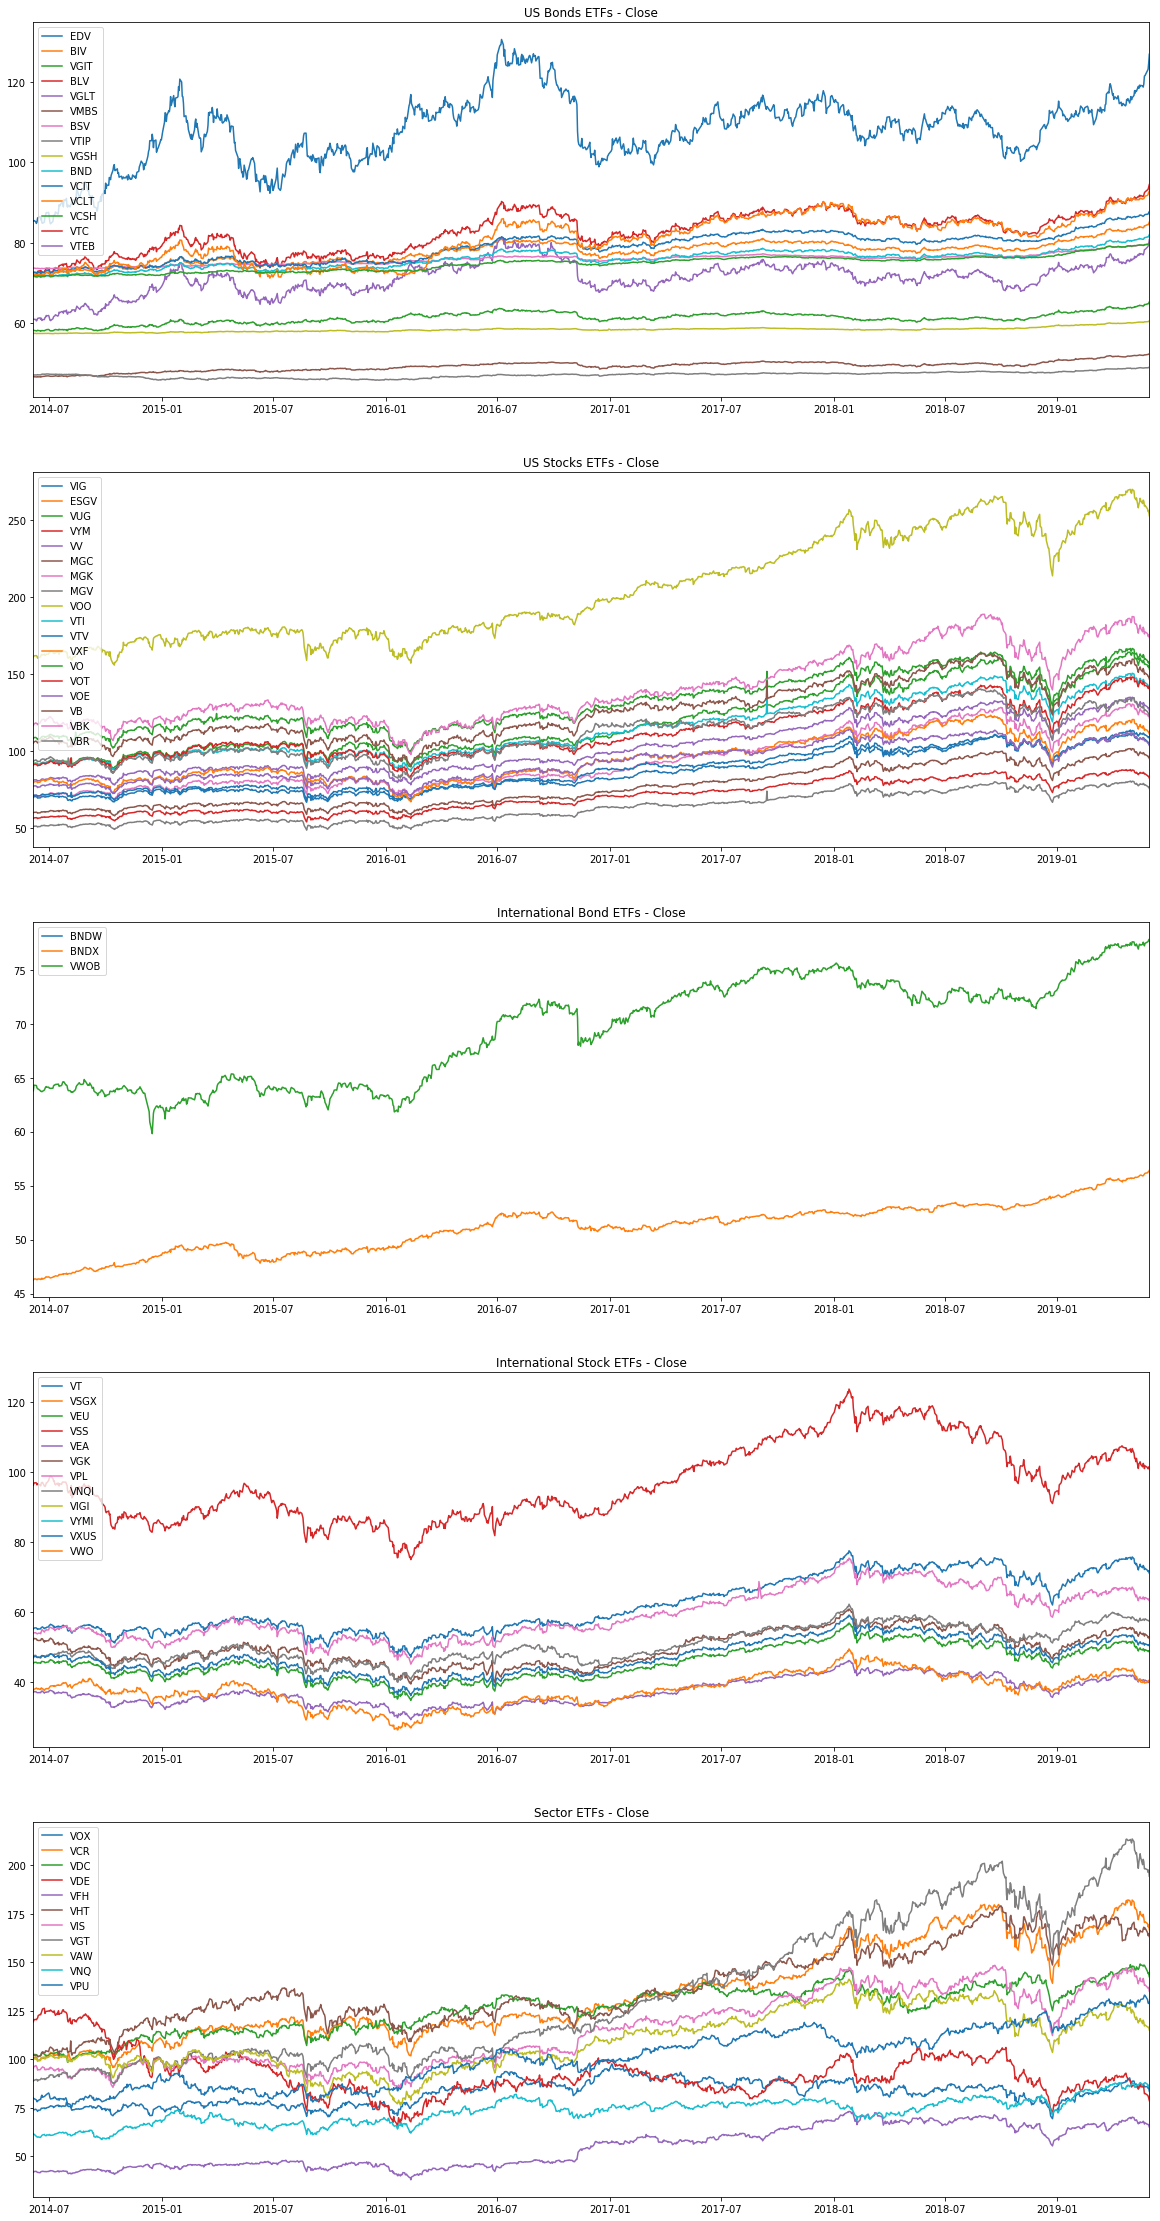

In [32]:
plt.figure(figsize=[20, 40])

# US Bonds
plt.subplot(5, 1, 1)
for i in etf_us_bonds_map['Ticker'].tolist():
    plt.plot(etf_data[i].close)    
plt.title('US Bonds ETFs - Close')
plt.legend(etf_us_bonds_map['Ticker'].tolist(), loc=2)
plt.xlim(etf_data.index[0], etf_data.index[-1])

# US Stocks
plt.subplot(5, 1, 2)
for i in etf_us_stocks_map['Ticker'].tolist():
    plt.plot(etf_data[i].close)    
plt.title('US Stocks ETFs - Close')
plt.legend(etf_us_stocks_map['Ticker'].tolist(), loc=2)
plt.xlim(etf_data.index[0], etf_data.index[-1])

# Intl Bonds
plt.subplot(5, 1, 3)
for i in etf_intl_bonds_map['Ticker'].tolist():
    plt.plot(etf_data[i].close)    
plt.title('International Bond ETFs - Close')
plt.legend(etf_intl_bonds_map['Ticker'].tolist(), loc=2)
plt.xlim(etf_data.index[0], etf_data.index[-1])

# Intl Stocks
plt.subplot(5, 1, 4)
for i in etf_intl_stocks_map['Ticker'].tolist():
    plt.plot(etf_data[i].close)    
plt.title('International Stock ETFs - Close')
plt.legend(etf_intl_stocks_map['Ticker'].tolist(), loc=2)
plt.xlim(etf_data.index[0], etf_data.index[-1])

# Sectors
plt.subplot(5, 1, 5)
for i in etf_sectors_map['Ticker'].tolist():
    plt.plot(etf_data[i].close)
plt.title('Sector ETFs - Close')
plt.legend(etf_sectors_map['Ticker'].tolist(), loc=2)
plt.xlim(etf_data.index[0], etf_data.index[-1])

## Save The Data

Create a list of output files

In [33]:
output = ['etf_us_bonds.pickle', 
          'etf_us_stocks.pickle', 
          'etf_intl_bonds.pickle', 
          'etf_intl_stocks.pickle', 
          'sectors.pickle']

Create a list of ETF data

In [34]:
data = [etf_us_bonds_data, 
        etf_us_stocks_data,
        etf_intl_bonds_data,
        etf_intl_stocks_data,
        etf_sectors_data]

Pickle

In [35]:
for i in range(len(output)):
    with open(output[i], 'wb') as f:
        pickle.dump(data[i], f)
    
    f.close()

## Conclusion
...